In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

In [2]:
def ts_lineplot(fdf,ylst,title='',filename='tmp.png',saveon=False,figsize=(15,10),**kwargs):
    # print(title)
    ax = fdf.reset_index().plot(x='TIMESTAMP',y = ylst,title=title,figsize=figsize,**kwargs)
    ax.grid(True)
    return ax
def lineplot(fdf,xx,ylst,title='',filename='tmp.png',saveon=False,figsize=(15,10),**kwargs):
    # print(title)
    ax = fdf.reset_index().plot(x=xx,y = ylst,title=title,figsize=figsize,**kwargs)
    ax.grid(True)
    return ax

# setting up the data

In [3]:
s1d1df = pd.read_csv('s1d1df_new_first.csv')
s1d1df['TIMESTAMP'] = pd.to_datetime(s1d1df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')
s1d2df = pd.read_csv('s1d2df_new_first.csv')
s1d2df['TIMESTAMP'] = pd.to_datetime(s1d2df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')

s1d1df_old = pd.read_csv('s1d1df.csv')
s1d1df_old['TIMESTAMP'] = pd.to_datetime(s1d1df_old['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')
s1d2df_old = pd.read_csv('s1d2df.csv')
s1d2df_old['TIMESTAMP'] = pd.to_datetime(s1d2df_old['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')

total_df = pd.DataFrame(columns= ['ping', 'dest_cmu', 'dest_aws', 'hour_of_day', 'day_of_week', 'num_of_hops', 'min_of_day'])

In [4]:
new_rows = []
for i in range(len(s1d1df)):
    for ping_column in ['PING2', 'PING3', 'PING4','PING5', 'PING6', 'PING7', 'PING8', 'PING9', 'PING10']:
        new_row = {
            'ping': s1d1df.loc[i, ping_column],
            'dest_cmu': 1,
            'dest_aws': 0,
            'TIMESTAMP': int(s1d1df.loc[i, 'TIMESTAMP'].timestamp()),
            'min_of_day': (s1d1df.loc[i, 'TIMESTAMP'].hour*60 + s1d1df.loc[i, 'TIMESTAMP'].minute),
            'min_of_day_norm': (s1d1df.loc[i, 'TIMESTAMP'].hour*60 + s1d1df.loc[i, 'TIMESTAMP'].minute)/(60*24)*(4*np.pi),
            'hour_of_day': s1d1df.loc[i, 'TIMESTAMP'].hour,
            'day_of_week': s1d1df.loc[i, 'TIMESTAMP'].dayofweek,
            'num_of_hops': s1d1df.loc[i, 'NUM_HOPS']
        }
        new_rows.append(new_row)
new_rows_df = pd.DataFrame(new_rows)
new_rows_df['rolling_avg'] = new_rows_df['ping'].rolling(window=1000).mean()
total_df = pd.concat([total_df, new_rows_df], ignore_index=True)
total_df

"""new_rows = []
for i in range(len(s1d1df_old)):
    for ping_column in ['PING2', 'PING3', 'PING4','PING5']:
        new_row = {
            'ping': s1d1df_old.loc[i, ping_column],
            'dest_cmu': 1,
            'dest_aws': 0,
            'TIMESTAMP': int(s1d1df_old.loc[i, 'TIMESTAMP'].timestamp()),
            'min_of_day': (s1d1df_old.loc[i, 'TIMESTAMP'].hour*60 + s1d1df_old.loc[i, 'TIMESTAMP'].minute),
            'min_of_day_norm': (s1d1df_old.loc[i, 'TIMESTAMP'].hour*60 + s1d1df_old.loc[i, 'TIMESTAMP'].minute)/(60*24)*(4*np.pi),
            'hour_of_day': s1d1df_old.loc[i, 'TIMESTAMP'].hour,
            'day_of_week': s1d1df_old.loc[i, 'TIMESTAMP'].dayofweek,
            'num_of_hops': s1d1df_old.loc[i, 'NUM_HOPS']
        }
        new_rows.append(new_row)
new_rows_df = pd.DataFrame(new_rows)
new_rows_df['rolling_avg'] = new_rows_df['ping'].rolling(window=1000).mean()
total_df = pd.concat([total_df, new_rows_df], ignore_index=True)
total_df"""

C:\Users\Rohini Pillai\AppData\Local\Temp\ipykernel_18364\370725872.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total_df = pd.concat([total_df, new_rows_df], ignore_index=True)


"new_rows = []\nfor i in range(len(s1d1df_old)):\n    for ping_column in ['PING2', 'PING3', 'PING4','PING5']:\n        new_row = {\n            'ping': s1d1df_old.loc[i, ping_column],\n            'dest_cmu': 1,\n            'dest_aws': 0,\n            'TIMESTAMP': int(s1d1df_old.loc[i, 'TIMESTAMP'].timestamp()),\n            'min_of_day': (s1d1df_old.loc[i, 'TIMESTAMP'].hour*60 + s1d1df_old.loc[i, 'TIMESTAMP'].minute),\n            'min_of_day_norm': (s1d1df_old.loc[i, 'TIMESTAMP'].hour*60 + s1d1df_old.loc[i, 'TIMESTAMP'].minute)/(60*24)*(4*np.pi),\n            'hour_of_day': s1d1df_old.loc[i, 'TIMESTAMP'].hour,\n            'day_of_week': s1d1df_old.loc[i, 'TIMESTAMP'].dayofweek,\n            'num_of_hops': s1d1df_old.loc[i, 'NUM_HOPS']\n        }\n        new_rows.append(new_row)\nnew_rows_df = pd.DataFrame(new_rows)\nnew_rows_df['rolling_avg'] = new_rows_df['ping'].rolling(window=1000).mean()\ntotal_df = pd.concat([total_df, new_rows_df], ignore_index=True)\ntotal_df"

In [5]:
new_rows = []
for i in range(len(s1d2df)):
    for ping_column in ['PING2', 'PING3', 'PING4','PING5', 'PING6', 'PING7', 'PING8', 'PING9', 'PING10']:
        new_row = {
            'ping': s1d2df.loc[i, ping_column],
            'dest_cmu': 0,
            'dest_aws': 1,
            'TIMESTAMP': int(s1d2df.loc[i, 'TIMESTAMP'].timestamp()),
            'min_of_day': (s1d2df.loc[i, 'TIMESTAMP'].hour*60 + s1d2df.loc[i, 'TIMESTAMP'].minute),
            'min_of_day_norm': (s1d2df.loc[i, 'TIMESTAMP'].hour*60 + s1d2df.loc[i, 'TIMESTAMP'].minute)/(60*24)*(4*np.pi),
            'hour_of_day': s1d2df.loc[i, 'TIMESTAMP'].hour,
            'day_of_week': s1d2df.loc[i, 'TIMESTAMP'].dayofweek,
            'num_of_hops': s1d2df.loc[i, 'NUM_HOPS']
        }
        new_rows.append(new_row)
new_rows_df = pd.DataFrame(new_rows)
new_rows_df['rolling_avg'] = new_rows_df['ping'].rolling(window=1000).mean()
total_df = pd.concat([total_df, new_rows_df], ignore_index=True)
total_df

"""new_rows = []
for i in range(len(s1d2df_old)):
    for ping_column in ['PING2', 'PING3', 'PING4','PING5']:
        new_row = {
            'ping': s1d2df_old.loc[i, ping_column],
            'dest_cmu': 1,
            'dest_aws': 0,
            'TIMESTAMP': int(s1d2df_old.loc[i, 'TIMESTAMP'].timestamp()),
            'min_of_day': (s1d2df_old.loc[i, 'TIMESTAMP'].hour*60 + s1d2df_old.loc[i, 'TIMESTAMP'].minute),
            'min_of_day_norm': (s1d2df_old.loc[i, 'TIMESTAMP'].hour*60 + s1d2df_old.loc[i, 'TIMESTAMP'].minute)/(60*24)*(4*np.pi),
            'hour_of_day': s1d2df_old.loc[i, 'TIMESTAMP'].hour,
            'day_of_week': s1d2df_old.loc[i, 'TIMESTAMP'].dayofweek,
            'num_of_hops': s1d2df_old.loc[i, 'NUM_HOPS']
        }
        new_rows.append(new_row)
new_rows_df = pd.DataFrame(new_rows)
print(new_rows_df)
new_rows_df['rolling_avg'] = new_rows_df['ping'].rolling(window=1000).mean()
total_df = pd.concat([total_df, new_rows_df], ignore_index=True)
total_df"""

"new_rows = []\nfor i in range(len(s1d2df_old)):\n    for ping_column in ['PING2', 'PING3', 'PING4','PING5']:\n        new_row = {\n            'ping': s1d2df_old.loc[i, ping_column],\n            'dest_cmu': 1,\n            'dest_aws': 0,\n            'TIMESTAMP': int(s1d2df_old.loc[i, 'TIMESTAMP'].timestamp()),\n            'min_of_day': (s1d2df_old.loc[i, 'TIMESTAMP'].hour*60 + s1d2df_old.loc[i, 'TIMESTAMP'].minute),\n            'min_of_day_norm': (s1d2df_old.loc[i, 'TIMESTAMP'].hour*60 + s1d2df_old.loc[i, 'TIMESTAMP'].minute)/(60*24)*(4*np.pi),\n            'hour_of_day': s1d2df_old.loc[i, 'TIMESTAMP'].hour,\n            'day_of_week': s1d2df_old.loc[i, 'TIMESTAMP'].dayofweek,\n            'num_of_hops': s1d2df_old.loc[i, 'NUM_HOPS']\n        }\n        new_rows.append(new_row)\nnew_rows_df = pd.DataFrame(new_rows)\nprint(new_rows_df)\nnew_rows_df['rolling_avg'] = new_rows_df['ping'].rolling(window=1000).mean()\ntotal_df = pd.concat([total_df, new_rows_df], ignore_index=True)\ntot

In [6]:
total_df = total_df.dropna(subset=['ping'])
total_df = total_df.dropna(subset=['rolling_avg'])
total_df = total_df.reset_index(drop=True)
total_df['min_cos'] = np.cos(total_df['min_of_day_norm'])
total_df

ping dest_cmu dest_aws hour_of_day day_of_week num_of_hops min_of_day  \
0       35.0        1        0          13           0          16        839   
1       61.0        1        0          13           0          16        839   
2       38.0        1        0          13           0          16        839   
3       42.0        1        0          13           0          16        839   
4       39.0        1        0          13           0          16        839   
...      ...      ...      ...         ...         ...         ...        ...   
163131  45.0        0        1          13           3           9        791   
163132  51.0        0        1          13           3           9        791   
163133  50.0        0        1          13           3           9        791   
163134  39.0        0        1          13           3           9        791   
163135  47.0        0        1          13           3           9        791   

           TIMESTAMP  min_of_day_norm  rolling_avg   min_cos  
0       1.722262e+09         7.321656       39.815  0.507538  
1       1.722262e+09         7.321656       39.826  0.507538  
2       1.722262e+09         7.321656       39.828  0.507538  
3       1.722262e+09         7.321656       39.832  0.507538  
4       1.722262e+09         7.321656       39.830  0.507538  
...              ...              ...          ...       ...  
163131  1.722518e+09         6.902777       46.857  0.814116  
163132  1.722518e+09         6.902777       46.873  0.814116  
163133  1.722518e+09         6.902777       46.880  0.814116  
163134  1.722518e+09         6.902777       46.875  0.814116  
163135  1.722518e+09         6.902777       46.880  0.814116  

[163136 rows x 11 columns]

# additional sin/cos tests with Jim

<Axes: xlabel='index'>

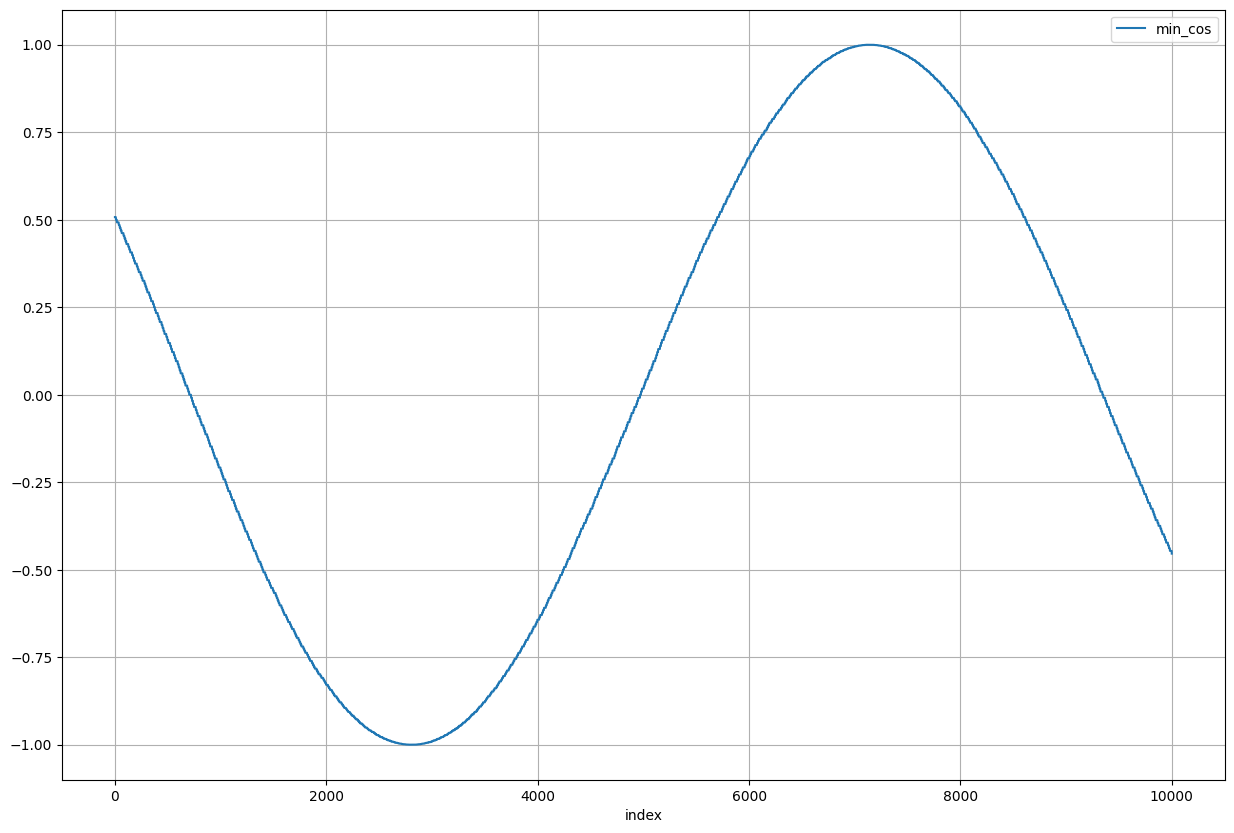

In [49]:
tdfx = total_df.copy()
tdfx['min_cos'] = total_df['min_of_day_norm'].map(lambda xx: math.cos(xx))
#tdfx=total_df.drop_duplicates(["min_of_day_norm"]).reset_index().reset_index()
tdfx
lineplot(total_df.iloc[0:10000], "index", ['min_cos'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    range       cos
0       0  1.000000
1       1  0.540302
2       2 -0.416147
3       3 -0.989992
4       4 -0.653644
5       5  0.283662
6       6  0.960170
7       7  0.753902
8       8 -0.145500
9       9 -0.911130
10     10 -0.839072
11     11  0.004426
12     12  0.843854
13     13  0.907447


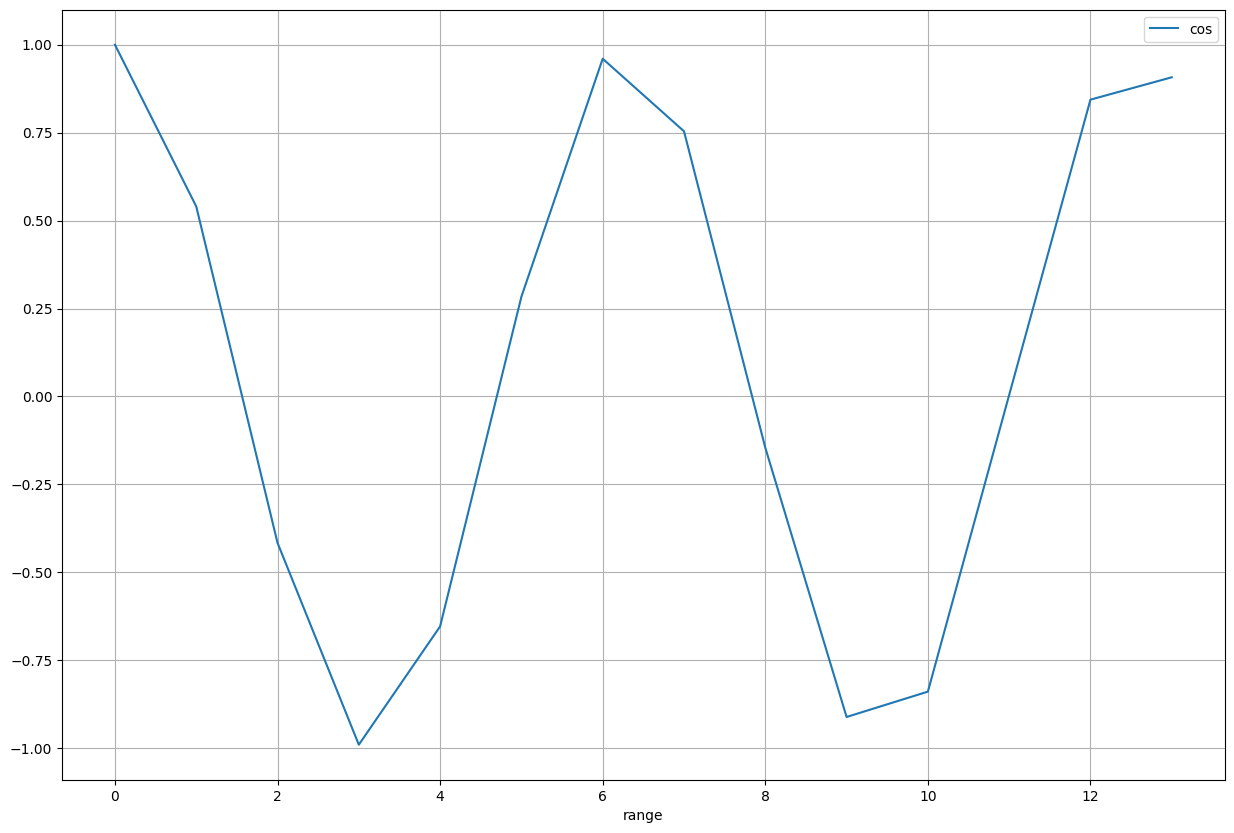

In [50]:
index=list(range(0,round(4*np.pi+1)))
print(index)
tdfx=pd.DataFrame(index, columns=["range"])
tdfx['range'] = tdfx.range
tdfx["cos"] = np.cos(tdfx.range)
print(tdfx)
lineplot(tdfx,'range', ['cos'])

#np.cos(np.array([0, np.pi/2, np.pi]))
tdfy = pd.DataFrame(np.cos(np.array([0, np.pi/2, np.pi])))
#tdfy

In [51]:
print(tdfx)

    range       cos
0       0  1.000000
1       1  0.540302
2       2 -0.416147
3       3 -0.989992
4       4 -0.653644
5       5  0.283662
6       6  0.960170
7       7  0.753902
8       8 -0.145500
9       9 -0.911130
10     10 -0.839072
11     11  0.004426
12     12  0.843854
13     13  0.907447


# sklearn modeling

In [24]:
# Separate independent variables (X) and dependent variable (y)
X = total_df[['dest_cmu', 'hour_of_day', 'day_of_week', 'num_of_hops']]
y = total_df['rolling_avg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
print(model)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to display predicted and actual values
results_df = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test.values
})

# Print the DataFrame
print("Predicted vs Actual values:")
print(results_df)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get the coefficients of the model
coefficients = model.coef_
intercept = model.intercept_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)
print("Intercept (constant term):", intercept)

LinearRegression()
Predicted vs Actual values:
       Predicted  Actual
0      39.694094  39.688
1      43.616311  41.588
2      46.196837  46.261
3      46.500467  47.403
4      39.749015  39.750
...          ...     ...
32623  45.976016  46.557
32624  43.821343  43.877
32625  42.456309  42.084
32626  43.450980  43.178
32627  47.329521  46.669

[32628 rows x 2 columns]
Mean Squared Error: 1.1046426646719714
R-squared: 0.8254884296335125
       Feature  Coefficient
2  day_of_week     1.381108
3  num_of_hops     0.110695
1  hour_of_day     0.027603
0     dest_cmu    -4.681008
Intercept (constant term): 42.16234196655464


In [25]:
# Assuming you have 'dest_cmu' in X_test
dest_cmu_values = X_test['dest_cmu'].values

# Add 'Destination' as a new column in the results DataFrame
results_df['Destination'] = dest_cmu_values

# Display the DataFrame to check the result
print(results_df)

       Predicted  Actual Destination
0      39.694094  39.688           1
1      43.616311  41.588           1
2      46.196837  46.261           0
3      46.500467  47.403           0
4      39.749015  39.750           1
...          ...     ...         ...
32623  45.976016  46.557           0
32624  43.821343  43.877           0
32625  42.456309  42.084           1
32626  43.450980  43.178           1
32627  47.329521  46.669           0

[32628 rows x 3 columns]


<Axes: xlabel='index'>

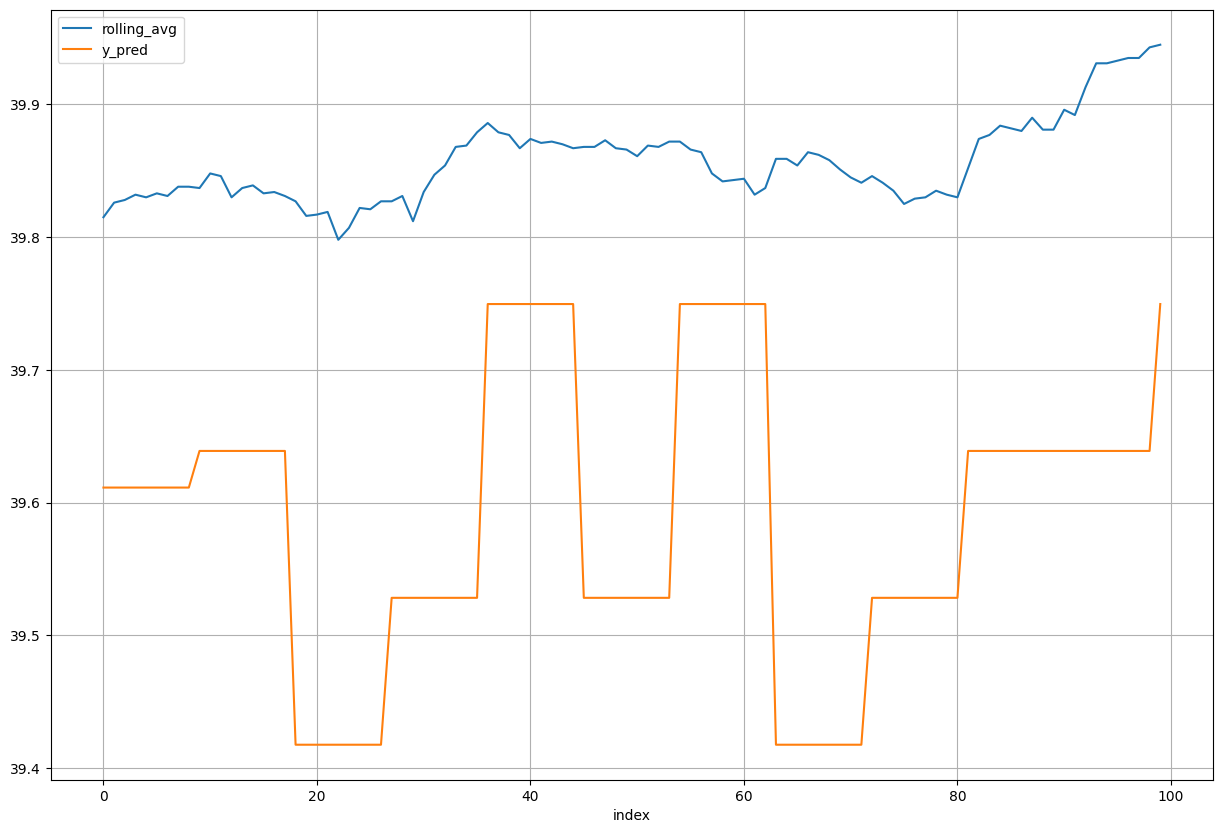

In [53]:
total_df["y_pred"] = model.predict(X)
total_df
tdfx=total_df[total_df.dest_cmu==1].iloc[0:100]
lineplot(tdfx, 'index', ['rolling_avg', 'y_pred'])

<Axes: xlabel='index'>

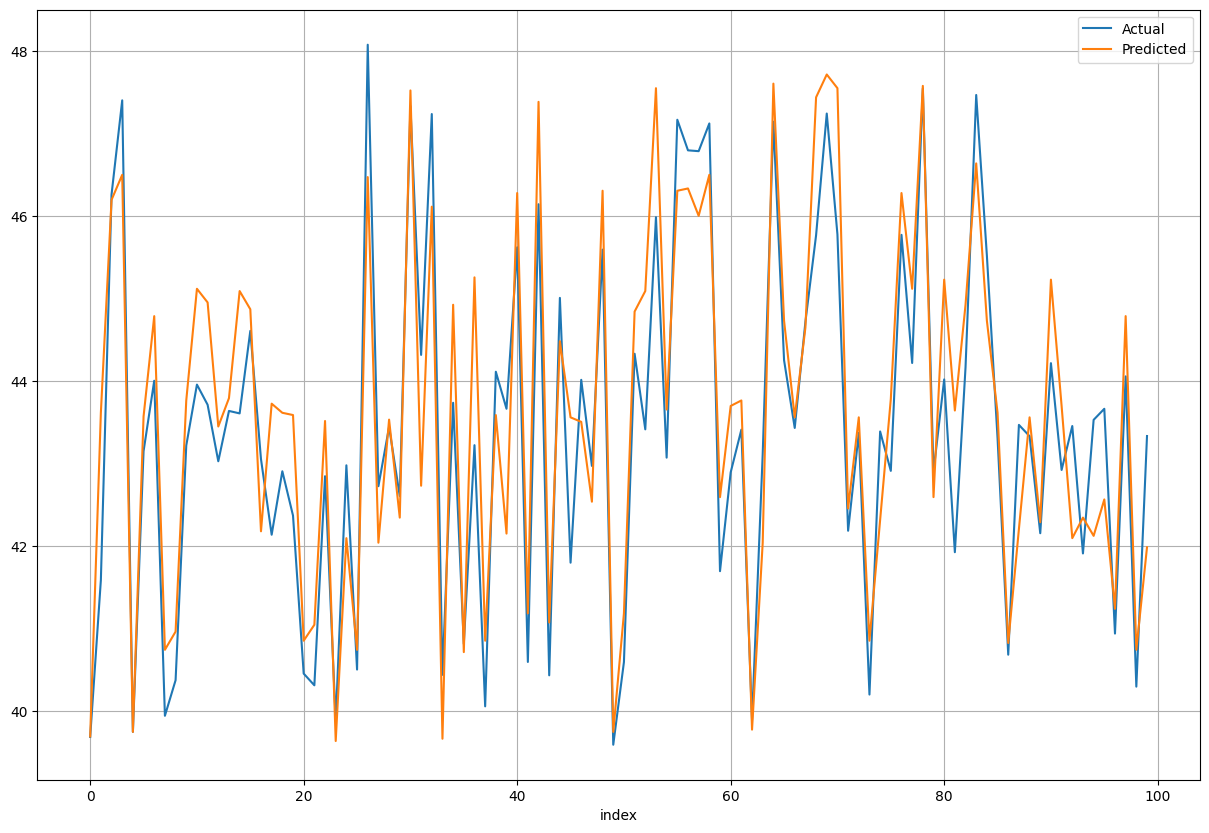

In [54]:
lineplot(results_df.iloc[0:100], 'index', ['Actual', 'Predicted'])

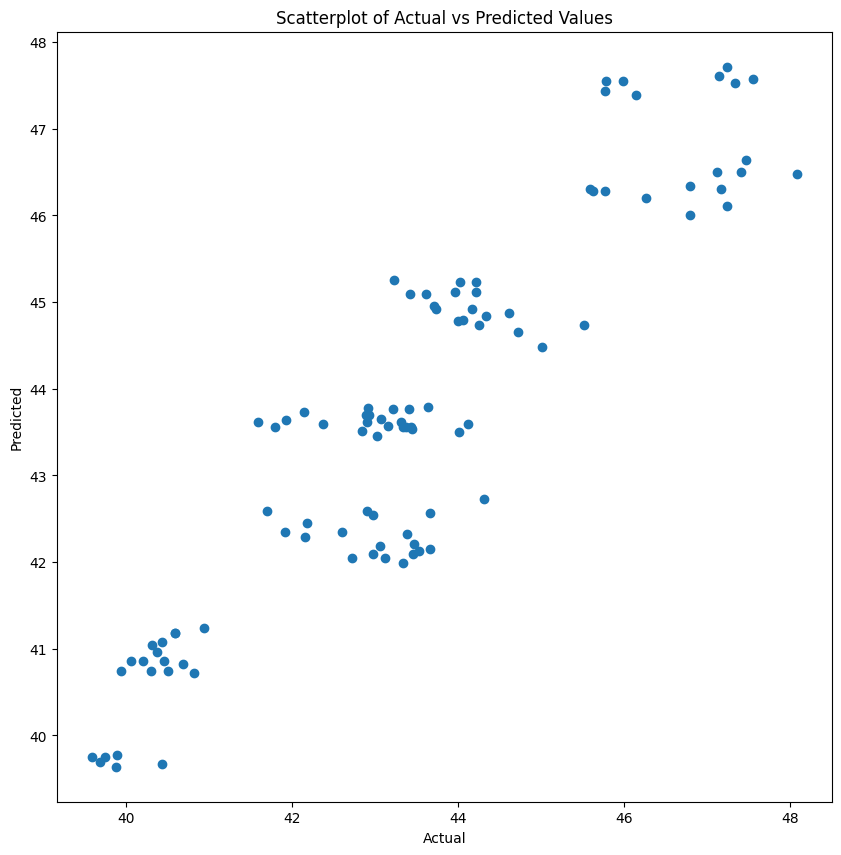

In [63]:
# Create the scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(results_df['Actual'].iloc[0:100], results_df['Predicted'].iloc[0:100])

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs Predicted Values')

# Show plot
plt.show()

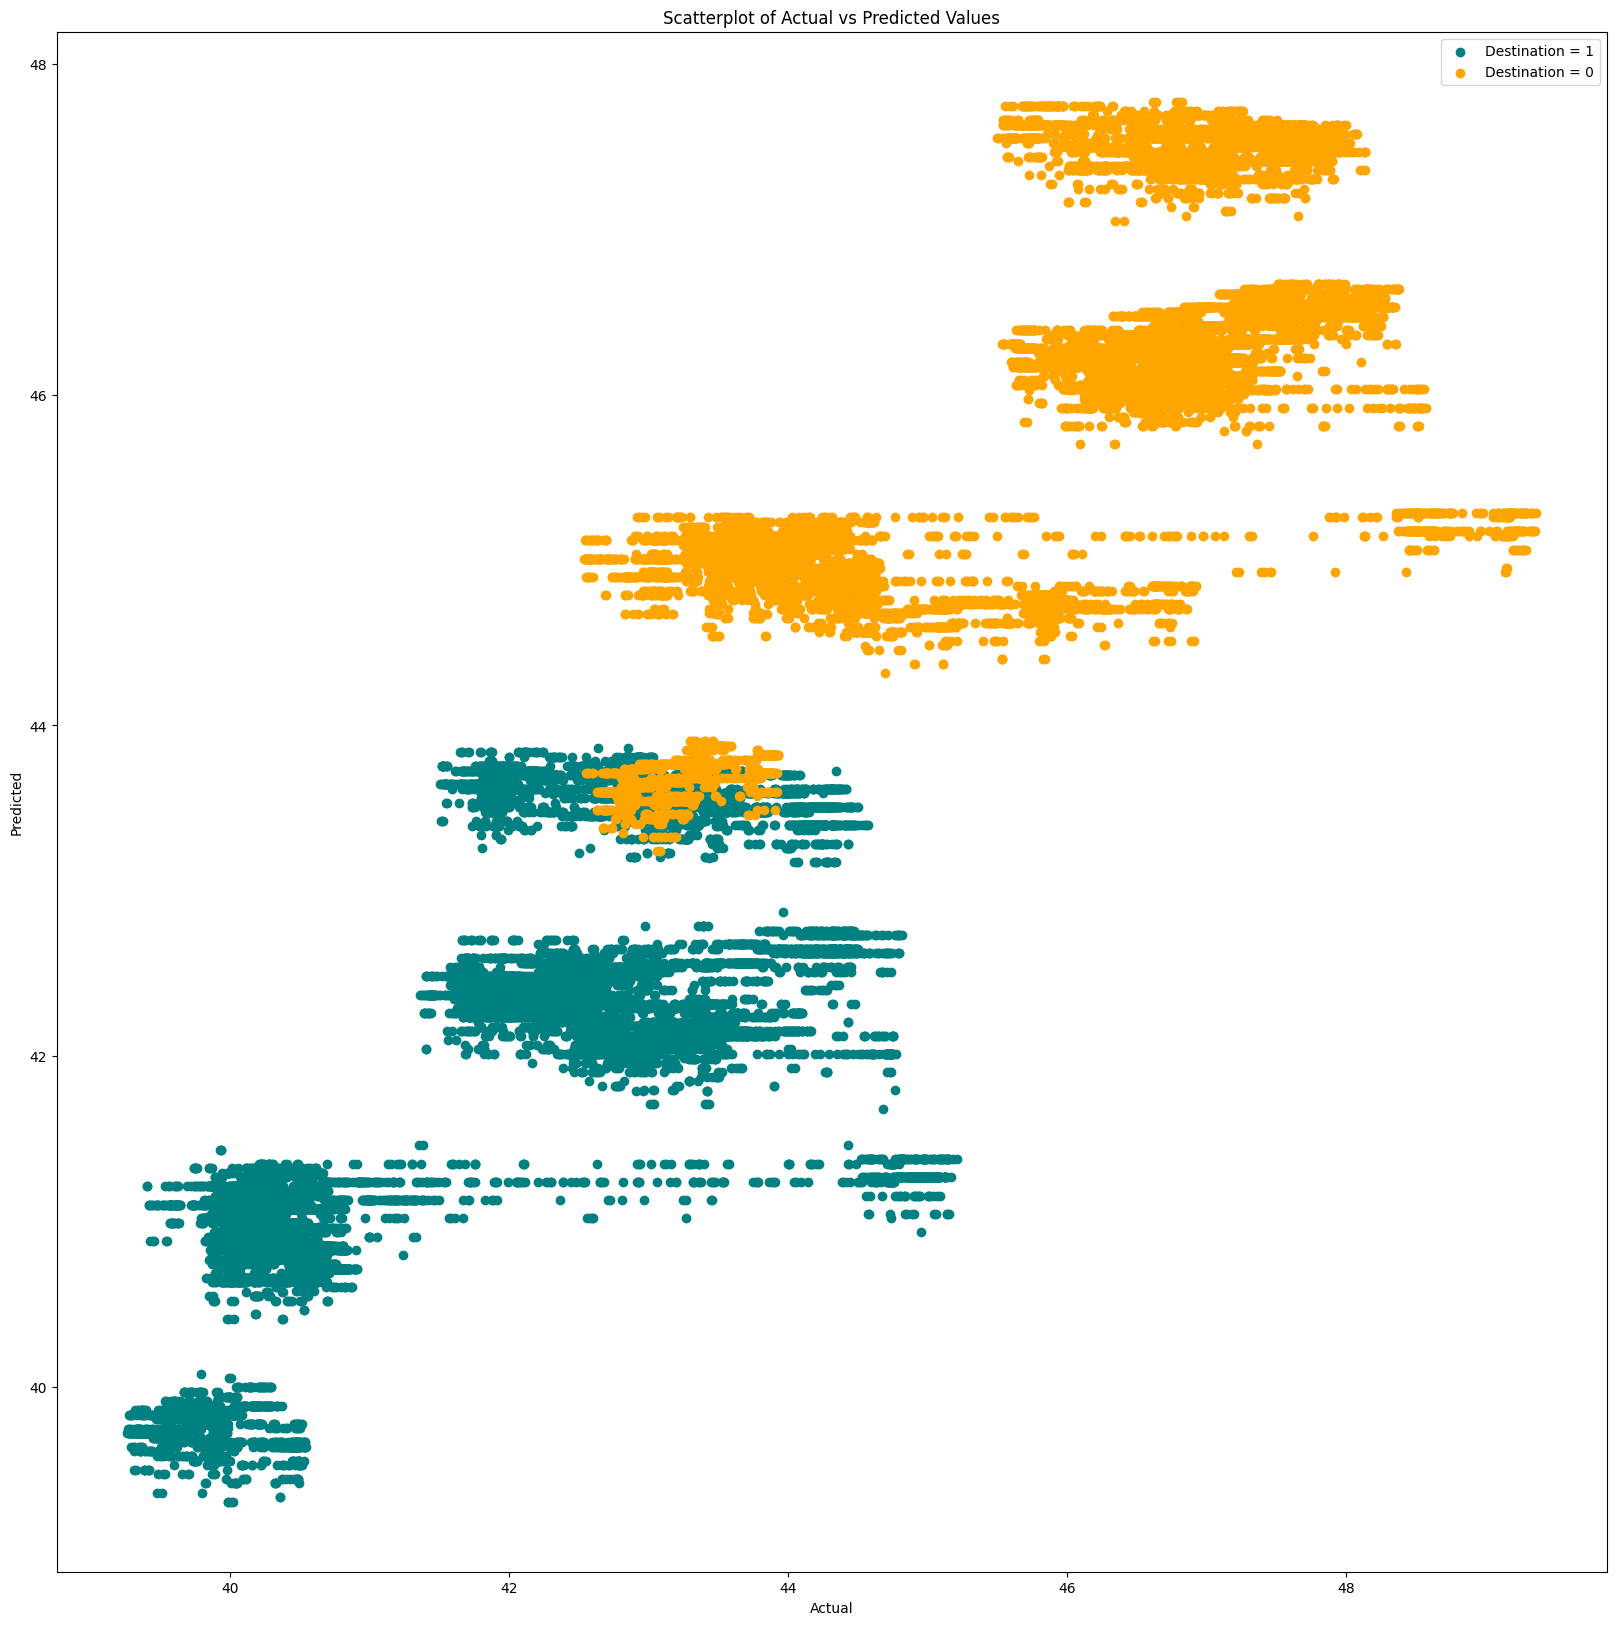

In [27]:
# Filter the results DataFrame based on the 'Destination' values
teal_points = results_df[results_df['Destination'] == 1]
orange_points = results_df[results_df['Destination'] == 0]

# Create the scatterplot
plt.figure(figsize=(20, 20))

# Plot teal points where 'Destination' is 1
plt.scatter(teal_points['Actual'], teal_points['Predicted'], color='teal', label='Destination = 1')

# Plot orange points where 'Destination' is 0
plt.scatter(orange_points['Actual'], orange_points['Predicted'], color='orange', label='Destination = 0')

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show plot
plt.show()

# Pytorch

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
 
model = nn.Sequential(
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
test_df = total_df.sample(frac=0.2, random_state=2) 
training_df = total_df.drop(test_df.index)
test_df
training_df

# Ensure there are no NaN values and that all data types are numerical
training_df[['dest_cmu', 'hour_of_day', 'day_of_week', 'num_of_hops']] = training_df[['dest_cmu', 'hour_of_day', 'day_of_week', 'num_of_hops']].apply(pd.to_numeric, errors='coerce')
training_df = training_df.dropna()

test_df[['dest_cmu', 'hour_of_day', 'day_of_week', 'num_of_hops']] = test_df[['dest_cmu', 'hour_of_day', 'day_of_week', 'num_of_hops']].apply(pd.to_numeric, errors='coerce')
test_df = test_df.dropna()

# Convert features and labels to numpy arrays
x_train = training_df[['dest_cmu', 'hour_of_day', 'day_of_week', 'num_of_hops']].values
y_train = training_df['rolling_avg'].values

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

x_test = test_df[['dest_cmu', 'hour_of_day', 'day_of_week', 'num_of_hops']].values
y_test = test_df['rolling_avg'].values

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [9]:
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Clear gradients from previous iteration

    # Forward pass
    y_pred = model(x_train_tensor)

    # Compute loss
    loss = loss_fn(y_pred.squeeze(), y_train_tensor)  # Squeeze y_pred to match y_train_tensor shape
    print(loss.item())

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

#print(model)
print(y_pred)
print(y_train_tensor)
# Compute validation loss
val_loss = loss_fn(y_pred.squeeze(), y_train_tensor)
    
# Print validation loss (optional)
print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {val_loss.item():.4f}')

1950.111572265625
1949.10302734375
1948.0679931640625
1947.001708984375
1945.8994140625
1944.7564697265625
1943.570556640625
1942.3399658203125
1941.0611572265625
1939.734619140625
1938.359130859375
1936.9365234375
1935.46533203125
1933.9410400390625
1932.359130859375
1930.7099609375
1928.988525390625
1927.1829833984375
1925.2978515625
1923.335205078125
1921.2974853515625
1919.1917724609375
1917.0157470703125
1914.765869140625
1912.4483642578125
1910.0716552734375
1907.625732421875
1905.12060546875
1902.56103515625
1899.9404296875
1897.257568359375
1894.5216064453125
1891.724609375
1888.864013671875
1885.9454345703125
1882.9696044921875
1879.9332275390625
1876.8370361328125
1873.67578125
1870.439208984375
1867.1295166015625
1863.7523193359375
1860.2982177734375
1856.7637939453125
1853.14990234375
1849.4578857421875
1845.6888427734375
1841.8447265625
1837.915283203125
1833.895263671875
1829.791748046875
1825.604248046875
1821.332763671875
1816.9776611328125
1812.5340576171875
1808.00952

In [10]:
from sklearn.metrics import mean_squared_error

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    # Forward pass on validation data
    y_pred_val = model(x_test_tensor)
    
    # Compute validation loss
    val_loss = loss_fn(y_pred_val.squeeze(), y_test_tensor)
    
    # Print validation loss (optional)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss.item():.4f}')

x_test = x_test_tensor.detach().numpy()
y_test = y_test_tensor.detach().numpy()

df = pd.DataFrame({
    #'x_test_1': x_test_tensor[:, 0].flatten(),  # Assuming x_test has 2 columns, showing the first one
    #'x_test_2': x_test_tensor[:, 1].flatten(),  # Assuming x_test has 2 columns, showing the second one
    'y_test': y_test_tensor.flatten(),
    'y_pred': y_pred_val.flatten(),
})
df

Epoch [10000/10000], Validation Loss: 0.6639


y_test     y_pred
0      43.527000  43.277134
1      47.283001  46.243092
2      43.148998  44.380260
3      44.886002  43.004795
4      40.058998  40.803143
...          ...        ...
32622  41.398998  41.655224
32623  43.381001  43.019020
32624  42.020000  43.139233
32625  46.676998  47.639225
32626  43.695000  43.793865

[32627 rows x 2 columns]

In [11]:
from sklearn.metrics import mean_squared_error

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    # Forward pass on validation data
    y_pred_val = model(x_test_tensor)
    
    # Compute validation loss
    val_loss = loss_fn(y_pred_val.squeeze(), y_test_tensor)
    
    # Print validation loss (optional)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss.item():.4f}')

# Convert tensors to numpy arrays
x_test = x_test_tensor.detach().numpy()
y_test = y_test_tensor.detach().numpy()
y_pred = y_pred_val.squeeze().detach().numpy()  # Ensure the shape is correct

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Create a DataFrame for visualization or analysis
df = pd.DataFrame({
    #'x_test_1': x_test_tensor[:, 0].flatten(),  # Assuming x_test has 2 columns, showing the first one
    #'x_test_2': x_test_tensor[:, 1].flatten(),  # Assuming x_test has 2 columns, showing the second one
    'y_test': y_test.flatten(),
    'y_pred': y_pred.flatten(),
})

df


Epoch [10000/10000], Validation Loss: 0.6639
MSE: 0.6639
R-squared: 0.8971


y_test     y_pred
0      43.527000  43.277134
1      47.283001  46.243092
2      43.148998  44.380260
3      44.886002  43.004795
4      40.058998  40.803143
...          ...        ...
32622  41.398998  41.655224
32623  43.381001  43.019020
32624  42.020000  43.139233
32625  46.676998  47.639225
32626  43.695000  43.793865

[32627 rows x 2 columns]

In [14]:
df['Destination'] = test_df['dest_cmu'].values
df

y_test     y_pred  Destination  dest_cmu
0      43.527000  43.277134            1         1
1      47.283001  46.243092            0         0
2      43.148998  44.380260            0         0
3      44.886002  43.004795            1         1
4      40.058998  40.803143            1         1
...          ...        ...          ...       ...
32622  41.398998  41.655224            1         1
32623  43.381001  43.019020            0         0
32624  42.020000  43.139233            1         1
32625  46.676998  47.639225            0         0
32626  43.695000  43.793865            1         1

[32627 rows x 4 columns]

<Axes: xlabel='index'>

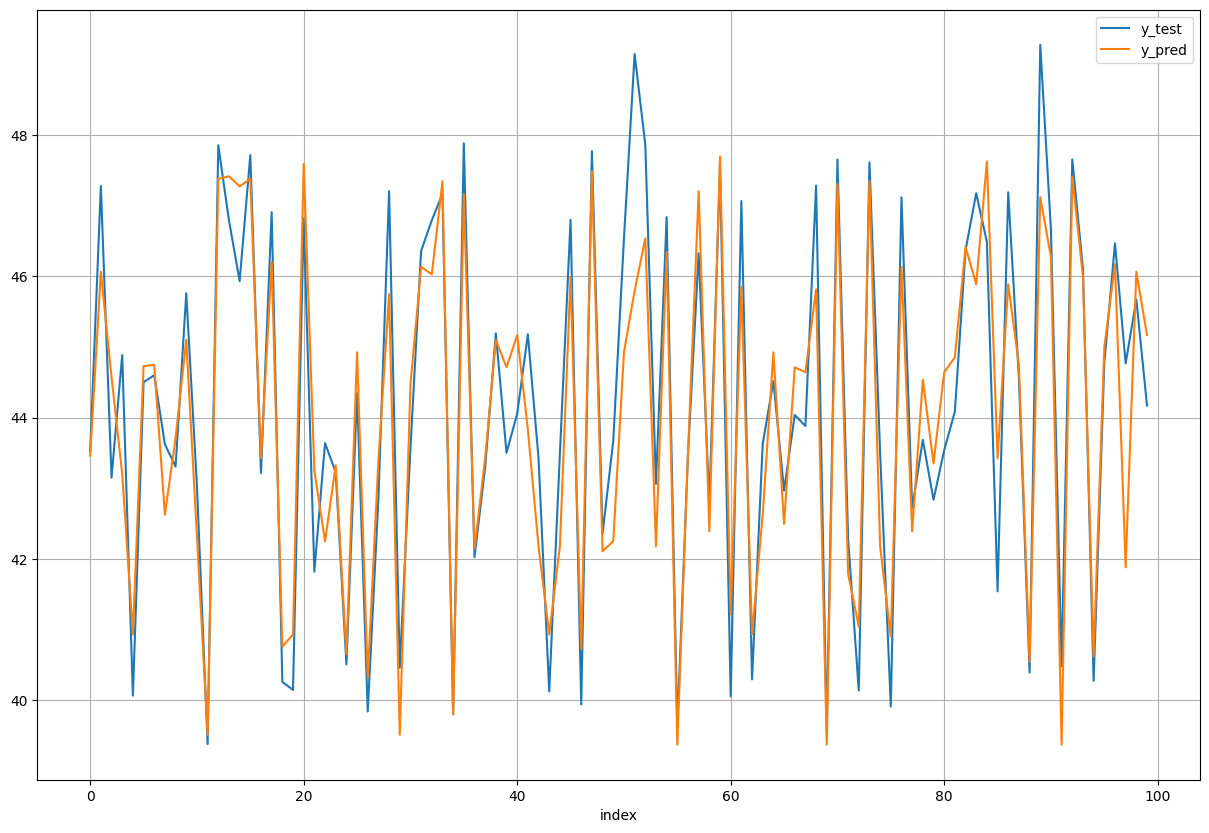

In [60]:
lineplot(df.iloc[0:100], 'index', ['y_test', 'y_pred'])

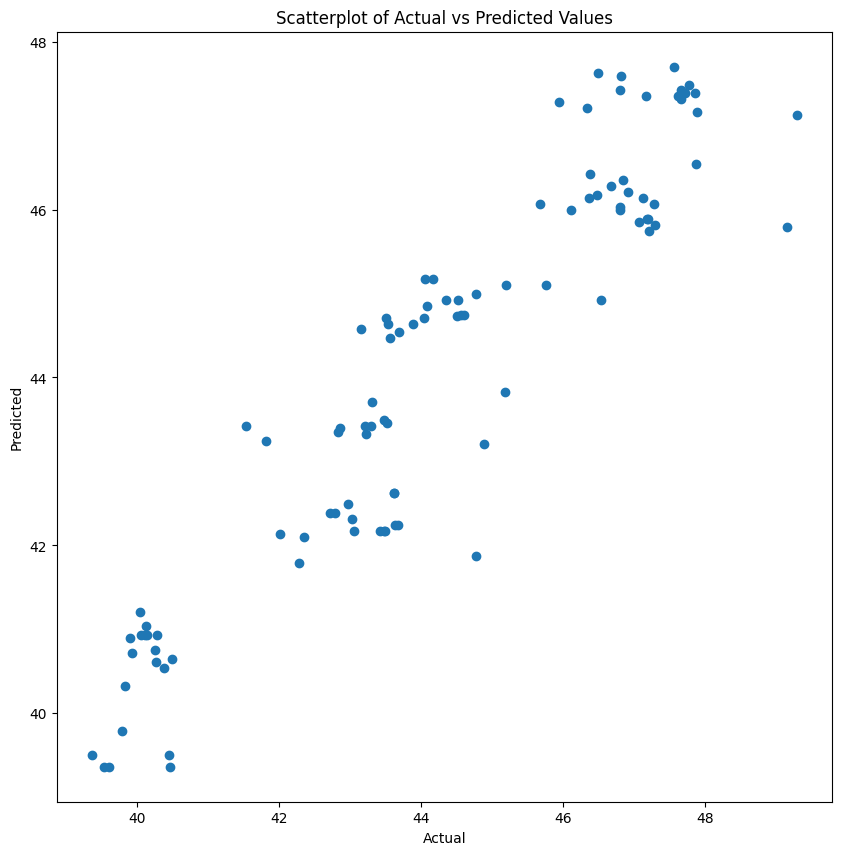

In [61]:
# Create the scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(df['y_test'].iloc[0:100], df['y_pred'].iloc[0:100])

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs Predicted Values')

# Show plot
plt.show()

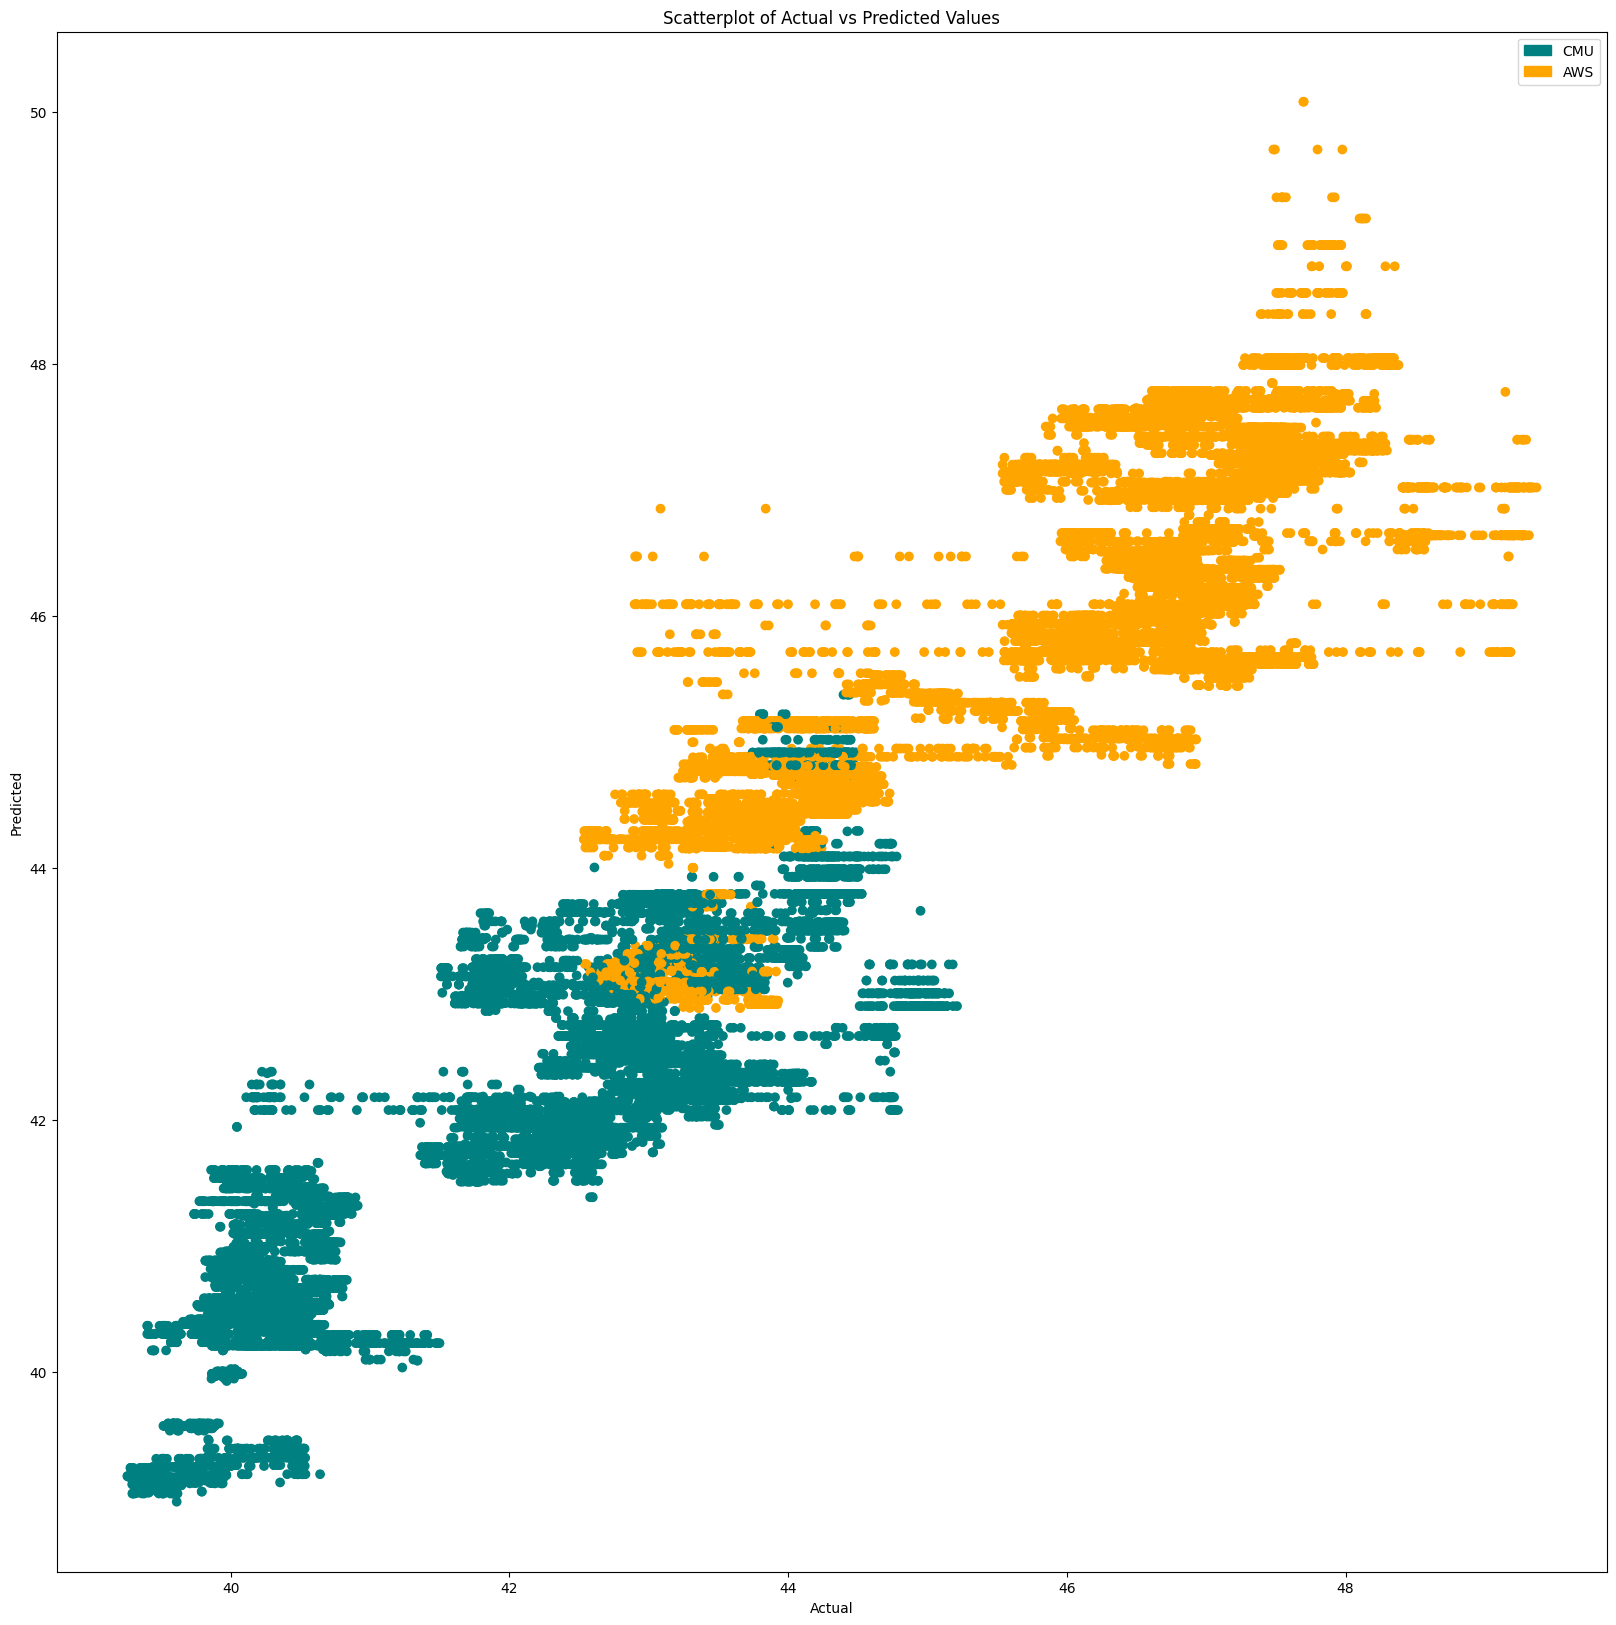

In [23]:
colors = df['Destination'].apply(lambda x: 'teal' if x == 1 else 'orange')

# Create the scatterplot
plt.figure(figsize=(20, 20))
plt.scatter(df['y_test'], df['y_pred'], c=colors)

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs Predicted Values')

# Add a legend
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='teal', label='CMU')
red_patch = mpatches.Patch(color='orange', label='AWS')
plt.legend(handles=[blue_patch, red_patch])

# Show plot
plt.show()